# Why do all good things come to an end?


  > Flames to dust
  >
  > Lovers to friends
  >
  > Why do all good things come to an end?
  >
  > Nelly Furtado, https://www.youtube.com/watch?v=4pBo-GL9SRg

# Do they?

Remember how we started?

```python
import re
import random
import eliza_language as lang


def reflect(fragment):
    tokens = fragment.lower().split()
    for i, token in enumerate(tokens):
        if token in lang.REFLECTIONS:
            tokens[i] = lang.REFLECTIONS[token]
    return ' '.join(tokens)


def analyze(statement):
    for pattern, responses in lang.PSYCHOBABBLE:
        match = re.match(pattern, statement.rstrip(".!"))
        if match:
            response = random.choice(responses)
            return response.format(*[reflect(g) for g in match.groups()])


def talk_to_me():
    print("Hello. How are you feeling today?")

    while True:
        statement = input("> ")
        print(analyze(statement))
```

# And now?

So far, during the last weeks, we learned how to program. But constructing software is way more than only programming.

It is similar to communication in the real world. What we did so far, corresponds to that you learned how to speak a foreign language. But you did not learn how to write a captivating novel or how to hold an interesting speech.

The latter is what _software egineering_ is about.

# Software Engineering

  > **software engineering.** (1) The application of a systematic, disciplined, quantifiable approach to the development, operation, and maintenance of software; that is, the application of engineering to software. ...
  >
  >  _IEEE Standard Glossary of Software Engineering Terminology_, IEEE std 610.12-1990, 1990., 
  > see for example https://www.idi.ntnu.no/grupper/su/publ/ese/ieee-se-glossary-610.12-1990.pdf
  
That is, creating software is more that programming! 

## Did we do more than programming?

We already applied typical software engineering practices. Did we? 

Yes, partly. We applied:
  
  * Version control with Git, to distribute the latest lecture material.
  * Perhaps you used the unit tests and test cases that we provided to test your code.
  * Likely you wrote some documentation in the form of docstrings, comments, or text files.

But there are many more issues, which we did not cover in this seminar, but which you may find interesting in your further studies or your later careers.

For example:  

  * **Requirements ellicitation**, that is how to figure out what other people want to have build/solved?

  * **Software Architecture**, how to structure our system into sub-systems that are appropriate for the solution?

  * **Deployment**, how do we actually build our system and make different parts of it operate on potentially many computers?

  * **Team Management**, how do we have to organize teams so that they know what to do and get things done on time?

  * **Time/Project Management**, how do we figure out which task takes how long, figure out it's importance, and when to complete it?

  * and many more...

Consequently, software engineering is to a high degree a social process, which in turn relies heavily on interaction with others to understand what they really want.

<img src="https://www.signavio.com/wp-content/uploads/2016/09/vertical-medien-iStock_75648673_XXXLARGE.jpg?w=1200&h=480&zc=1" width=600/>


This is where IT studies are often misunderstood and clichés about nerdy developers are just wrong.

Let us try to illustrate some aspects of software engineering on the following scenario.

## Scenario

  > Let's imagine that some of your fellow students realize that you often have to collect data via surveys during your studies. In the beginning you handle those tasks via [Google Forms](https://www.google.com/forms/about/).
  >
  > Eventually, some of your fellow students realize that they do not want to continue using this service as all of your surverys along with the collected responses are stored on Google's servers.
  >
  > They come to you and utter the desire that they would like to have their own survey system.

### What could be done from that description to solve thier problem?

  * You could point them to one of the many other survey services, such as http://www.surveymonkey.com
  * You could create an email account to which respondents email their surveys and then you crowdsource the task of collecting all the replies in an Excel sheet, which will eventually be emailed to your friends.
  * and many more... your imagination sets the limits.

Now, that you know how to program with Python and that you have an idea about writing webservers with it, you are **brave** and tell you fellow students that you think you can build a small software systems, which allows them to run various kinds of surveys online.

![](images/brave.png)

But where to start?

Likely, instead of directly starting to program a system of which you think that it will appropriately implement their requirements, it is likely a good idea to talk to them to try to figure out what their requirements actually are.

<div style="float:left; width:400px">
    <img src="http://media.cleveland.com/roadrant_impact/photo/road-rant-rhoades-car-7efb1399a88e2961.jpg" width="400px"/>
</div>
<div style="float:right; width:400px">
    <img src="https://cleantechnica.com/files/2017/08/Tesla-Model-X-Silver.jpg" width="400px"/>
</div>

### How do we know what to program?

One of the most important Software Engineering activities is about how we can ellicit and capture the requirements for a project so that we are sure to not miss anything of importance in our solution and so that we provide a solution which actually matches what is desired. 

So quite likely, you have to meet with your friends and you have to try to figure out what it is that they need essentially.


![](http://gazetekarinca.com/wp-content/uploads/2017/04/anket.jpg)

#### After some meetings...

You likely figured out that they need for sure a system that can display questionaires in a browser window and that collects the responses in some form of a database.

So you start working and write a server similar to this one:
    
    
```python
import os
import sqlite3
from flask import Flask, render_template, request


app = Flask(__name__, static_url_path='')


def init_db(db='survey_replies.db'):
    # [...not displayed here...]
    pass

def save_reply_to_db(data, db='survey_replies.db'):
    # [...not displayed here...]
    pass


@app.route('/', methods=['GET', 'POST'])
def serve_file():
    if request.method == 'GET':
        return render_template('index.html')
    elif request.method == 'POST':
        users_reply = request.form
        save_reply_to_db(users_reply.values())
        return 'Thank you! Your answers are saved.'


if __name__ == '__main__':
    app.run(host='127.0.0.1', debug=True)
```

Inspect the complete code in `questionaire_server/server.py`.

<head>
    <link href="//netdna.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" rel="stylesheet">
    <title>Sample HTML Survey Form</title>
    <style></style>
</head>

<body>
    <h1><center>Sample HTML Survey Form</center></h1>
    <h4><center>Qualification Seminar</center></h4>
    <form action="/" method="post">
        <hr>
        <p>
            The purpose of the survey would be stated here at the top of the survey. This survey should take less than 10 minutes to complete. This example is based on <a href="http://www1.udel.edu/dsacher/survey/">Example online</a>
        </p>
        <p>
            Some simple demographic information could be collected with radio buttons (e.g., gender, nationality), selection boxes (e.g., date of birth, snack preferences, etc.):
        </p>
        <h3>Please tell us a little about yourself. </h3>
        <p>
            Gender:
            <input type="RADIO" name="gender" value="female">Female
            <input type="RADIO" name="gender" value="male">Male
            <input type="RADIO" name="gender" value="na">Don't want to tell
        </p>
        <p>
            Date of birth: Month
            <select name="mob">
                <option selected="" value="">?</option>
                <option value="1">Jan</option>
                <option value="2">Feb</option>
                <option value="3">Mar</option>
                <option value="4">Apr</option>
                <option value="5">May</option>
                <option value="6">Jun</option>
                <option value="7">Jul</option>
                <option value="8">Aug</option>
                <option value="9">Sept</option>
                <option value="10">Oct</option>
                <option value="11">Nov</option>
                <option value="12">Dec</option>
            </select> Day
            <select name="dob">
                <option selected="" value="">?</option>
                <option>1</option>
                <option>2</option>
                <option>3</option>
                <option>4</option>
                <option>5</option>
                <option>6</option>
                <option>7</option>
                <option>8</option>
                <option>9</option>
                <option>10</option>
                <option>11</option>
                <option>12</option>
                <option>13</option>
                <option>14</option>
                <option>15</option>
                <option>16</option>
                <option>17</option>
                <option>18</option>
                <option>19</option>
                <option>20</option>
                <option>21</option>
                <option>22</option>
                <option>23</option>
                <option>24</option>
                <option>25</option>
                <option>26</option>
                <option>27</option>
                <option>28</option>
                <option>29</option>
                <option>30</option>
                <option>31 </option>
            </select> Year
            <select name="yob">
                <option selected="" value="">??</option>
                <option>1990</option>
                <option>1991</option>
                <option>1992</option>
                <option>1993</option>
                <option>1994</option>
                <option>1995</option>
                <option>1996</option>
                <option>1997</option>
                <option>1998</option>
                <option>1999</option>
                <option>2000</option>
                <option>2001</option>
                <option>2002</option>
                <option>2003</option>
                <option>2004</option>
                <option>2005</option>
            </select>
        </p>
        <p>
            Nationality:
            <input type="RADIO" name="nation" value="1">Danish
            <input type="RADIO" name="nation" value="2">Swedish
            <input type="RADIO" name="nation" value="3">Norwegian
            <input type="RADIO" name="nation" value="4">Finish
            <input type="RADIO" name="nation" value="5">Non-Scandinavian
        </p>
        <p>
            Favorite ice-cream:
            <select name="fav_icecream">
                <option selected="" value=""> ?</option>
                <option value="1">Vanilla</option>
                <option value="2">Chocolate</option>
                <option value="3">Strawberry</option>
                <option value="4">Lemon</option>
                <option value="5">Other</option>
            </select>
        </p>
        <hr>
        <h3>Select the answer that is true most of the time.</h3>
        <p>
            <table border="">
                <tbody>
                    <tr align="CENTER">
                        <td width="75"> </td>
                        <td width="75"><b>Strongly<br>agree</b></td>
                        <td width="75"><b>Agree</b></td>
                        <td width="75"><b>Neither<br>agree<br>nor<br>disagree</b></td>
                        <td width="75"><b>Disagree</b></td>
                        <td width="75"><b>Strongly<br>disagree</b></td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            We did not eat sufficient ice cream during the seminar.</td>
                        <td>
                            <input type="RADIO" name="icecream" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            There should have been more cake.</td>
                        <td>
                            <input type="RADIO" name="cake" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            I am angry because nobody shared cookies with me.</td>
                        <td>
                            <input type="RADIO" name="cookies" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            Raisins should not be a cookie ingredient.</td>
                        <td>
                            <input type="RADIO" name="ingredient" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="5">
                        </td>
                    </tr>
                </tbody>
            </table>
        </p>
        <hr>
        <p></p>
        <p>
            Do you have any additional thoughts on the topic of the survey?
            <br>
            <textarea name="comment" rows="4" cols="50"></textarea>
        </p>
        <p></p>
        <p>
            If you would like to get informed about the results of the survey, please type your e-mail address below:
            <br>
        </p>
        <center>
            E-mail address:
            <input type="text" name="email" size="40" maxlength="80">
        </center>
        <p></p>
        <p>
            Thank you for taking the survey. To submit the results, press the
            <b>Send info</b> button below.
        </p>
        <p></p>
        <p>
            <input type="submit" value="Send info">
            <input type="reset" value="Clear values">
        </p>
        <hr>
    </form>
</body>

</html>

#### You think you are done.

Now, you think you are done. 

You show the system to your friends, explain them how to use it and how to create other surveys.

But suddenly, they realize:

  > Hov, we also want to see the reponses in a nice way. Currently, they are hidden in the database.

So you take another session with them trying to understand what they mean by _"Seeing the responses in a nice way."_

That could be:

  * You create a report over all of the responses as a CSV file.
  * You create a report over all of the responses as an Excel spreadsheet.
  * You create another small websystem that shows an overview of the responses in a browser.
  * etc.

#### So you implement another small system

```python
import sqlite3
from flask import Flask, render_template, request


app = Flask(__name__, static_url_path='')


@app.route('/')
def serve_report():
    db = 'survey_replies.db'
    with sqlite3.connect(db) as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM Replies')
        contents = c.fetchall()

        for idx, line in enumerate(contents):
            print(f'Reply {idx}: {line}')
    return render_template('report.html', reply_lines=contents)


if __name__ == '__main__':
    app.run(host='127.0.0.1', port=5001, debug=True)
```



<head>
</head>

<body>
    <h1><center>Replies collected so far.</center></h1>
    <table style="width:80%">
        <tbody><tr>
            <th>Gender</th>
            <th>Month</th>
            <th>Day</th>
            <th>Year</th>
            <th>Nationality</th>
            <th>Favorite Ice Cream</th>
            <th>Ice Cream</th>
            <th>Cake</th>
            <th>Cookies</th>
            <th>Ingredient</th>
            <th>Comment</th>
            <th>Email</th>
        </tr>
        
        <tr>
            <th>female</th>
            <th>5</th>
            <th>7</th>
            <th>1999</th>
            <th>3</th>
            <th>5</th>
            <th>2</th>
            <th>2</th>
            <th>3</th>
            <th>3</th>
            <th>I do not have anything to say.</th>
            <th>ano@nymous.org</th>
        </tr>
        
        <tr>
            <th>male</th>
            <th>10</th>
            <th>21</th>
            <th>2004</th>
            <th>5</th>
            <th>2</th>
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>I like brownies but nobody seems to be interested :(</th>
            <th>who@cares.org</th>
        </tr>
        
        <tr>
            <th>na</th>
            <th>1</th>
            <th>1</th>
            <th>1990</th>
            <th>1</th>
            <th>4</th>
            <th>4</th>
            <th>3</th>
            <th>2</th>
            <th>1</th>
            <th>Kammerjunker!</th>
            <th>ingen@ved.det</th>
        </tr>
        
    </tbody></table>
</body>

# System Integration


So suddenly you already wrote a quite complex distrubuted system, which consists of two subsystems. 

The two subsystems are integrated via access to a single database.

# Architecture

<img src="images/architecture.png" width="500px"/>

# Deployment


Currently, the survey system runs on your computer.

That is of course not a proper solution as you cannot be always at ITU and cannot have your computer always up and running when someone wants to run another survey.

So you talk to ITU's IT department to figure out if you can run your survey system on one of their servers that is accessible within ITU.

They give you access to one, you install Python on it, copy your programs over, start the server programs (listening to port `0.0.0.0`), open ports 5000 and 5001 on the servers and likely you are done.

# Monitoring

However, your system in the current state writes to one single database file.

Imagine your friends start a survey where all ITU students reply, that database file grows and suddenly it becomes bigger than the hard disk that ITU's IT department gave you...

What will happen?

Your server program will crash and nobody will be able to reply to any survey anymore.

After this happens twice, you likely come to the idea to write a small program that sends you notifications before the program will crash so that you can take appropriate meassures.

# New Features

Your current systems implements already some features, you can:

  * Create a survey manually in code
  * Others can respond to surveys online
  * Reports of surveys can be seen online
  
  
But perhaps you want to create new functionality. For example, sending reports in Excel spreadsheets to the survey creators, creating plots and statistics about replies, etc.

All those are called features of your system.

## Computational thinking

![](images/3c.jpg)

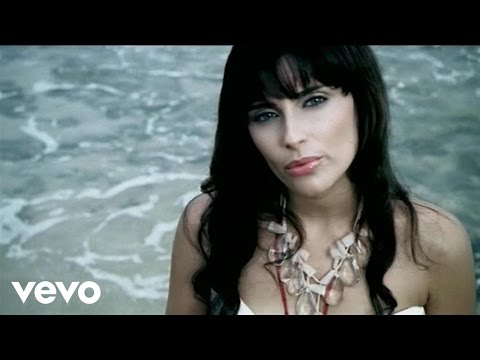

In [1]:
from IPython.display import YouTubeVideo
#YouTubeVideo("4pBo-GL9SRg", autoplay=1, theme="light")
YouTubeVideo("4pBo-GL9SRg")